# Classifying movie reviews
**A binary classification example**

Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem.
In this example, movie reviews will be classified as positive or negative, based on the text content of the reviews.

## The IMDB dataset
You’ll work with the [IMDB dataset](https://www.imdb.com/): a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

* `num_words=10000` means you'll only keep the top 10,000 most frequently ocurring words in the training data. Rare words will be discarded.

* `train_data` an `test_data` are lists of reviews. Each review is a list of word indices ranked by frequency.

* `train_labels` and `test_labels` are lists of 0s and 1s,where 0 stands for *negative* and 1 for *positive*.

## Preparing the data
You have to turn the lists into tensors. There are 2 ways to do that:
* Pad the lists so that they all have the same length, turn them into an integer tensor of shape `(samples, word_indices)`, and use as the first layer in the network a layer capable of handling such integer tensors. (The *Embedding* layer).
* One-hot encode the lists and turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence `[3,5]` into a 10,000-dimentional vector that would be all 0s except for `[3,5]`. The use a *Dense* layer as first layer, capable of handling floating-point vector data.

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## The model definition
There are two key architecture decisions to be made about such a stack of Dense layers:
* How many layers to use
* How many hidden units to choose for each layer


**Hidden unit:** Dimension in the representation space of the layer.
* *Intuitively ->* "How much freedom you're allowing the network to have when learning internal representations."

Having more hidden units allows the network to learn more complex representations, but it makes the netwoek mor computotionally expensive and may lead to learning unwanted patterns.

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

## Compiling the model
Finally, you need to choose a **loss function** and an **optimizer**.
In this case, *binary_crossentropy* is the best option as **loss function**, because we are dealing with output probabilities. **Crossentropy** is a quantity from the field of Information THeory that measures the distance between probability distributions.

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Custom Optmizer, losses and metrics
You can pass and optimizer class instance as the `oṕtimizer` argument, and  pass function objects as the `loss` or `metrics` argument.

In [7]:
from keras import optimizers
from keras import losses
from keras import metrics

customOptimizer = optimizer=optimizers.RMSprop(lr=0.001)
customLoss = losses.binary_crossentropy
customMetric = [metrics.binary_accuracy]

model.compile(optimizer=customOptimizer,
loss=customLoss,
metrics=customMetric)

## Training the model
In order to test the model you need to create a validation set by setting apart 10,000 samples from the original training data.

In [8]:
x_training_test = x_train[:10000]
x_train_values = x_train[10000:]

y_training_test = y_train[:10000]
y_train_values = y_train[10000:]

We'll be training the model for 20 epochs, in mini-batches of 512 samples. At the same time, we'll monitor loss and accuracy on the 10,000 samples setted appart.

In [9]:
history = model.fit(x_train_values,
                    y_train_values,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_training_test,y_training_test))

Epoch 1/20
30/30 [==============================] - 3s 81ms/step - loss: 0.5511 - accuracy: 0.7610 - val_loss: 0.4416 - val_accuracy: 0.8156
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3363 - accuracy: 0.8895 - val_loss: 0.3147 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2493 - accuracy: 0.9171 - val_loss: 0.3309 - val_accuracy: 0.8625
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2001 - accuracy: 0.9326 - val_loss: 0.2762 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1648 - accuracy: 0.9466 - val_loss: 0.2813 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1411 - accuracy: 0.9541 - val_loss: 0.2858 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1190 - accuracy: 0.9626 - val_loss: 0.3008 - val_accuracy: 0.8834
Epoch 8/20
30

## Plotting the accuracy and loss
Calling `model.fit()` returns a `History` object, which has a member `history`, which is a dictionary containing the following keys:

* `acc`: Training accuracy
* `val_acc`: Validation accuracy
* `loss`: Training loss
* `val_loss`: Validation loss

### Loss graph

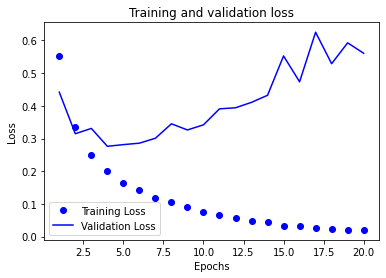

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20+1)

plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values, 'b', label= 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

### Accuracy graph

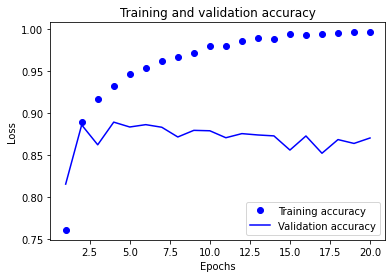

In [13]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label="Training accuracy")
plt.plot(epochs,val_acc_values,'b',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

After 2 epochs, the results are optimized

## Evaluating the model

In [14]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.6063 - accuracy: 0.8576


[0.606295108795166, 0.8575999736785889]

In [12]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Example with only 4 epochs, and thee results are better due to avoiding *overfitting*.

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4714 - accuracy: 0.8100
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2776 - accuracy: 0.9012
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2162 - accuracy: 0.9226
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3139 - accuracy: 0.8760


[0.3138647973537445, 0.8759599924087524]

## Generating new predictions

In [18]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.22121923],
       [0.9999473 ],
       [0.97171867],
       ...,
       [0.16254824],
       [0.11131062],
       [0.8110411 ]], dtype=float32)